<a href="https://colab.research.google.com/github/GuilhermeDeAssis123/DataScience/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

> Vamos comceçar instalando e importando todas as biblioecas necessárias para a realização da análise e posteriormente a realização do modelo. 

In [1]:
!pip install -q scikit-plot

In [2]:
# importar os pacotes necessários
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

sns.set_style(style = 'dark')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


>Aqui realizamos a importação do nosso **dataset**.

In [3]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

> Aqui nesta etapa vamos realizar a análise de dados em cima do dataset, com o intuito de corrigir possíveis problemas como dados ausentes, outliers, etc. Dessa forma podemos garantir que nosso modelo de *Machine Learning* funcionará corretamente. **Vamos começar com a cara do nosso dataset.**

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


> Podemos observar que a maioria das **features** estão cripitografadas, o que permite maior segurança as dados. Porém isso não interfere na análise dos dados. Podemos ver também que as variáveis criptografadas estão normalizadas, enquanto que as demais não. Em seguida vamos olhar nosso resumo estatístico.

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


> Podemos observar que a distribução das variáveis não apresenta indícios de alguma anormalidade nos dados, um bom indicador de que o dataset pode estar pronto para a o treinamento do modelo.

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

> Acima vemos que não existem dados ausentes nesse dataset, outro bom indicador que o conjunto de dados está pronto para treinamento.

Número de casos -- Fraude(1) -- legitmo(0):
0    284315
1       492
Name: Class, dtype: int64


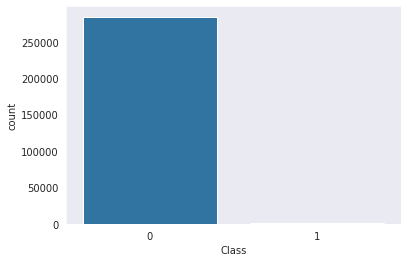

In [7]:
print('Número de casos -- Fraude(1) -- legitmo(0):\n{}'.format(df.Class.value_counts()))
sns.countplot('Class',data=df);

> Por ultimo, mas não menos importante vemos que existe um grande desbalanceamento na quantidade de transações verdadeiras e fraudes. Isso pode causar ineficiencia do modelo quanto a indentificar fraudes pela pouca quantidade de entradas desse tipo no dataset. Por isso mais a frente vamos realizar um balanceamento para solucionar essse problema. Vamos olhar agora para a quantidade de transações legitimas e fraudes no decorrer do tempo.

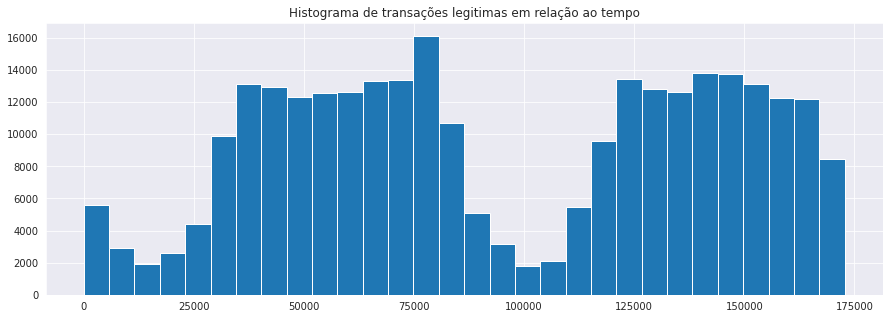

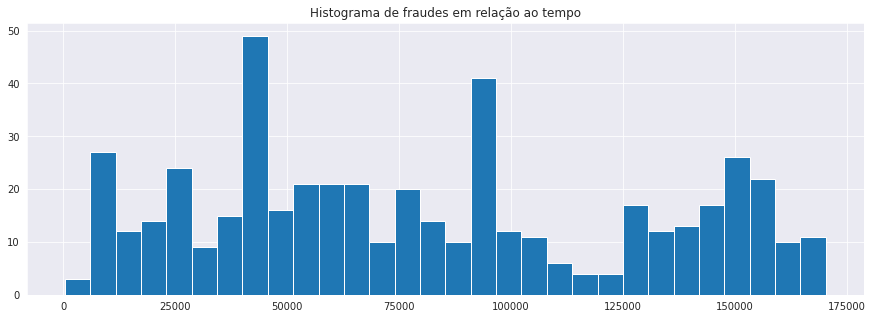

In [8]:
fig, ax = plt.subplots(figsize=(15,5))

ax = df.Time[df.Class==0].hist(bins=30)
ax.set_title("Histograma de transações legitimas em relação ao tempo");

fig, ax2 = plt.subplots(figsize=(15,5))

ax2 = df.Time[df.Class==1].hist(bins=30)
ax2.set_title("Histograma de fraudes em relação ao tempo");

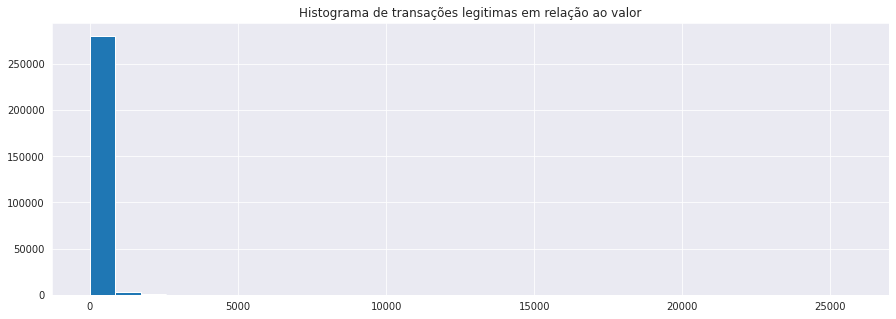

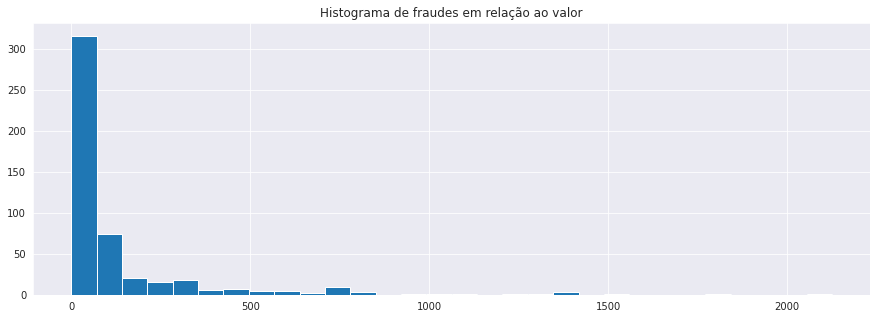

In [9]:
fig, ax = plt.subplots(figsize=(15,5))

ax = df.Amount[df.Class==0].hist(bins=30)
ax.set_title("Histograma de transações legitimas em relação ao valor");

fig, ax2 = plt.subplots(figsize=(15,5))

ax2 = df.Amount[df.Class==1].hist(bins=30)
ax2.set_title("Histograma de fraudes em relação ao valor");

> Acima podemos observar que geralmente a tentativa de fraude ocorre com valores mais baixos, talvez porque transações pequenas não chamem tanta atenção de um banco quanto transações milhonarias por exemplo.

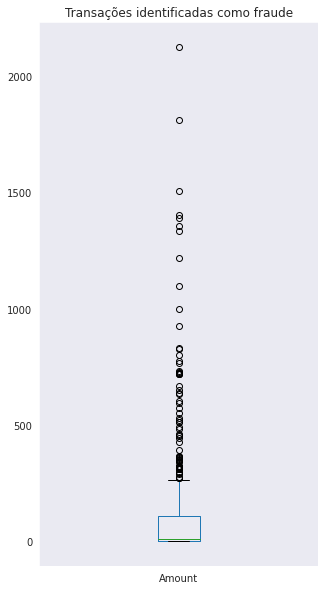

In [10]:
fig, ax = plt.subplots(figsize=(5,10))

ax = df.Amount[df.Class==1].plot(kind='box')
ax.set_title("Transações identificadas como fraude");

In [11]:
df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

> Acima vemos  um resumo estatístico das transações fraudadas. Temos 491 valores. A média das transações fraudulentas é de 118 reais, um  valor relativamente baixo, para não chamar a atenção.

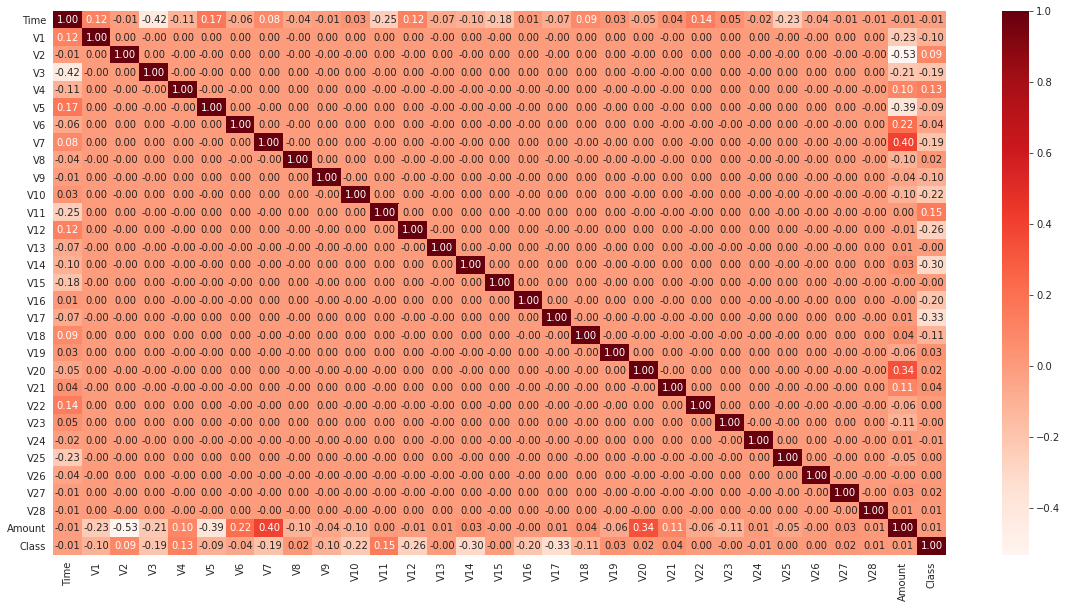

In [12]:
matrix = df.corr()

fig, ax =  plt.subplots(figsize=(20,10))
sns.heatmap(matrix,cmap='Reds',fmt='.2f',annot=True, ax=ax);


> Acima temos uma matriz de correlação entre as variáveis plotada através de um heatmap(mapa de calor) que mostra o quanto uma variável influência na outra. Porém como dito anteriormente precisamos rebalancear os dados devido a baixo número de entradas fraudulentas em relação ao total. Dessa forma essa matriz deverá mudar.

## Preparação dos Dados



> Nesta etapa vamos preparar os dados que foram identificados como passiveis de melhora para poder aumentar o desempenho do dataset para melhor treinar o modelo. Vamos normalizar as variáveis que não estão normalizadas e rebalancear o conjunto de dados, alem de ja separarmos os conjuntos de treino e de teste.

In [13]:
df_clean = df.copy()
padronizacao = StandardScaler()

df_clean['std_amount'] = padronizacao.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = padronizacao.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [14]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

In [15]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

1    369
0    369
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


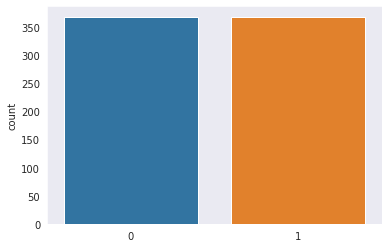

In [16]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);

> Aqui depois de termos usado a técnica de undersampling que reduz a quantidade de dados do maior conjunto para se igualar ao menor, conseguimos igualar a quantidade de entradas fraudulentas e legitimas, assim espera-se melhorar as correlações entre as variáveis e em consequencia o aprendizado do modelo também.

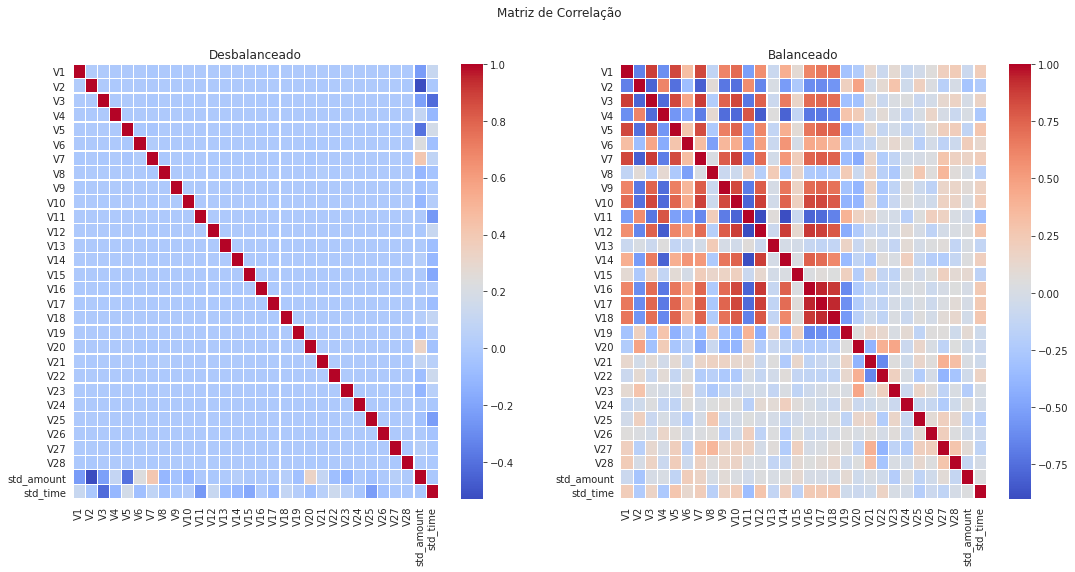

In [17]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

> Veja como na matriz da direita(pós balanceamento) existem muito mais correlações entre as features. Isso mostra que o ajuste surtiu resultados e agora os dados esttão prontos para passar pelo modelo.

## Modelo de Machine Learning


> Aqui para realizar a classificação entre transações legitmas e fraudes vamos utilizar o modelo de regressão logistica. Vamos utilizar os dados presentes em `X-rus` e `y_rus` para realizar o treinamento do modelo. Em seguida vamos realizar o mesmo processo utilizando uma arvore de decisão e observar qual modelo obterve mais assertividade.

> É importante ressaltar que para bases de dados totalmente desbalanceadas como essa, a acurácia não pode ser levada em consideração, pois podemos ter 99% de acerto nas classificações, porém tendo um acerto inferior 60% na classifcação de fraudes. Devido a isso olharemos para a coluna recall( quantidade de valores classificados como verdadeiros positivos sobre a quantidade de valores realmente verdadeiros positivos) e para a métrica [AUC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772) ou área sob a curva.


In [23]:
# instanciando o modelo de regressão logistica

np.random.seed(2)
model = LogisticRegression()

#treinar modelo de regressão logistica
model.fit(X_rus,y_rus)

# realizar previsões em cima do conjunto de teste
y_pred = model.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9706    0.9850     71079
           1     0.0491    0.8780    0.0930       123

    accuracy                         0.9704     71202
   macro avg     0.5244    0.9243    0.5390     71202
weighted avg     0.9981    0.9704    0.9834     71202

Acurácia: 0.9704

AUC: 0.9243



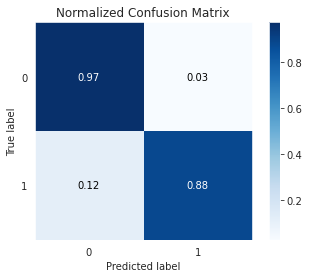

In [25]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

In [33]:
from sklearn.tree import DecisionTreeClassifier

#instanciando o modelo de arvore de decisão
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_rus,y_rus)

y_pred_tree = model.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9417    0.9699     71079
           1     0.0256    0.8862    0.0499       123

    accuracy                         0.9416     71202
   macro avg     0.5127    0.9140    0.5099     71202
weighted avg     0.9981    0.9416    0.9683     71202

Acurácia: 0.9416

AUC: 0.9140



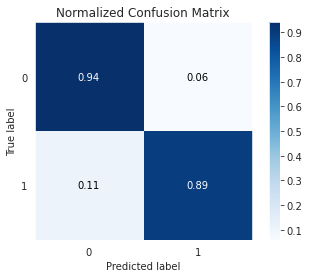

In [34]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_tree, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_tree, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_tree)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_tree)))

## Avaliar o desempenho do modelo


> Pudemos observar que obtivemos algumas diferenças nos resultados por parte dos dois modelos:
* O modelo de DecisionTree obteve índice de 89% de acerto nas fraudes enquanto que o modelo de regressão logistica obteve 88% de acerto nas fraudes.
* O modelo de DecisionTree obteve índice AUC de 91%  enquanto que o modelo de regressão logistica obteve 92% de AUC.
* O modelo de DecisionTree obteve índice acerto de 94% nos casos de transações veridicas enquanto que o modelo de regressão logistica obteve 97% de acerto nos casos legitimos.

## Conclusão

* Como se trata de um modelos para identificação de fraudes em cartão de crédito, ou seja, um modelos para um banco, **é extremamente importante atingir o maior número possível de fraudes**. Dessa maneira seria **melhor utilzar o segundo modelo(Árvore de Decisão)**, pois esse obteve um **melhor desempenho na detecção de fraudes**. Embora tenha perdido em desempenho de transações legitimas(94% de acerto contra 97% da regressão logistica), **é melhor** para o banco ter **falsos postivos** do que falsos negativos, isso representa **menos prejuizo**.